# Comparative Analysis of European Option Pricing using Binomial Trees and Black-Scholes Model

In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

#Assumptions Binomial Vs BS

| Assumption              | Binomial Model      | Black-Scholes Model       |
| ----------------------- | ------------------- | ------------------------- |
| Time Structure          | Discrete            | Continuous                |
| Price Dynamics          | Up/down movements   | Geometric Brownian Motion |
| Volatility              | Can vary per step   | Constant                  |
| Distribution of Returns | Not assumed         | Log-normal                |
| Risk-Neutral Valuation  | Yes                 | Yes                       |
| Trading                 | Periodic (at nodes) | Continuous                |


#Binomial Tree Model

##Theory

The **Binomial Tree** model approximates the price of European options by simulating possible paths the stock price can take over time.

Let the number of time steps be $N$, and define:

* $\Delta t = \frac{T}{N}$: length of each time step
* $u = e^{\sigma \sqrt{\Delta t}}$: up factor
* $d = e^{-\sigma \sqrt{\Delta t}} = \frac{1}{u}$: down factor
* $p = \frac{e^{r \Delta t} - d}{u - d}$: risk-neutral probability
* $q = 1 - p$

At maturity $T$, compute the option value at each final node:

* **Call option payoff:** $C_i^N = \max(S_0 \cdot u^i \cdot d^{N - i} - K, 0)$
* **Put option payoff:** $P_i^N = \max(K - S_0 \cdot u^i \cdot d^{N - i}, 0)$

Then work backward in time:

* **Recursively compute:**

  $C_i^n = e^{-r \Delta t} [p \cdot C_{i+1}^{n+1} + q \cdot C_i^{n+1}]$

  $P_i^n = e^{-r \Delta t} [p \cdot P_{i+1}^{n+1} + q \cdot P_i^{n+1}]$

until $n = 0$, and you obtain the option prices:

* $C_0^0$: European call option price
* $P_0^0$: European put option price

---


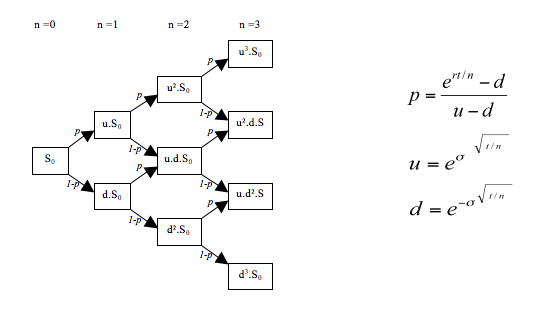

In [ ]:
from IPython.display import Image
Image('/content/drive/MyDrive/binomial_model_lattice.jpg')

##CODE

In [ ]:

class BinomialTreeModel:
    def __init__(self, S, K, T, r, sigma, N, option_type='call', u=None, d=None):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.N = N
        self.option_type = option_type
        self.custom_u = u
        self.custom_d = d

    def price(self):
        dt = self.T / self.N
        u = self.custom_u if self.custom_u else np.exp(self.sigma * np.sqrt(dt))
        d = self.custom_d if self.custom_d else 1 / u
        p = (np.exp(self.r * dt) - d) / (u - d)
        discount = np.exp(-self.r * dt)

        asset_prices = self.S * d ** np.arange(self.N, -1, -1) * u ** np.arange(0, self.N + 1)
        if self.option_type == 'call':
            option_values = np.maximum(asset_prices - self.K, 0)
        else:
            option_values = np.maximum(self.K - asset_prices, 0)

        for i in range(self.N - 1, -1, -1):
            option_values = discount * (p * option_values[1:] + (1 - p) * option_values[:-1])

        return option_values[0]



In [ ]:

bt=BinomialTreeModel(S=100, K=100, T=1, r=0.05, sigma=0.2, N=100, option_type='call')
print(bt.price())

10.430611662249113


Example:-

"A certain stock is currently selling for **\$100**. The feeling is that for each month over the next two months, the stock’s price will rise by **1%** or fall by **1%**. Assuming a risk-free rate of **1%**, calculate the price of a European call with the various strike prices *K = 102*, *K = 101*, *K = 100*, *K = 99*, *K = 98*, and *K = 97*."



In [ ]:
S = 100
T = 2 / 12
r = 0.01
N = 2
u = 1.01
d = 0.99

strike_prices = [102, 101, 100, 99, 98, 97]
results = {}

for K in strike_prices:
    model = BinomialTreeModel(S, K, T, r, sigma=0, N=N, option_type='call', u=u, d=d)
    price = model.price()
    results[K] = round(price, 4)

print("European Call Prices (2-step, u=1.01, d=0.99):")
for K, price in results.items():
    print(f"K = {K}: Price = {price}")


European Call Prices (2-step, u=1.01, d=0.99):
K = 102: Price = 0.0029
K = 101: Price = 0.2959
K = 100: Price = 0.5888
K = 99: Price = 1.3725
K = 98: Price = 2.1632
K = 97: Price = 3.1615


In [ ]:
S = 100
T = 2 / 12
r = 0.01
N = 2
u = 1.01
d = 0.99


for K in [102,101, 100, 99, 98, 97]:

    price_of_forward =  K*np.exp(-(2/12)*(0.01)) -100
    call_price = BinomialTreeModel(S,K,T,r,sigma=0,N=N,option_type='call',u=u,d=d).price()
    put_price = BinomialTreeModel(S,K,T,r,sigma=0,N=N,option_type='put',u=u,d=d).price()
    print(f"Price of {K}-call : \t {round(call_price,4)}")
    print(f"Price of {K}-put : \t {round(put_price,4)}")
    print(f"Price of {K}-forward : \t {round(price_of_forward,4)}\n")

Price of 102-call : 	 0.0029
Price of 102-put : 	 1.8331
Price of 102-forward : 	 1.8301

Price of 101-call : 	 0.2959
Price of 101-put : 	 1.1277
Price of 101-forward : 	 0.8318

Price of 100-call : 	 0.5888
Price of 100-put : 	 0.4223
Price of 100-forward : 	 -0.1665

Price of 99-call : 	 1.3725
Price of 99-put : 	 0.2076
Price of 99-forward : 	 -1.1649

Price of 98-call : 	 2.1632
Price of 98-put : 	 0.0
Price of 98-forward : 	 -2.1632

Price of 97-call : 	 3.1615
Price of 97-put : 	 0.0
Price of 97-forward : 	 -3.1615



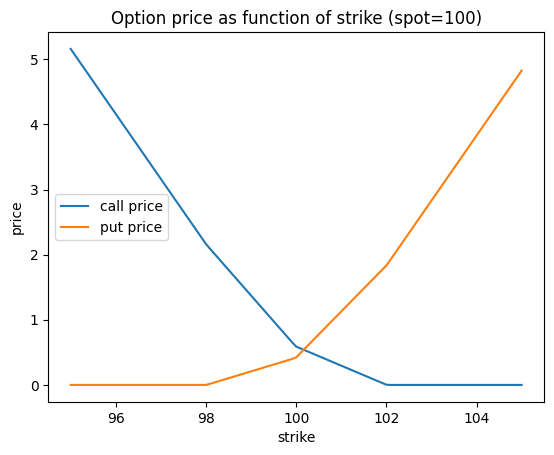

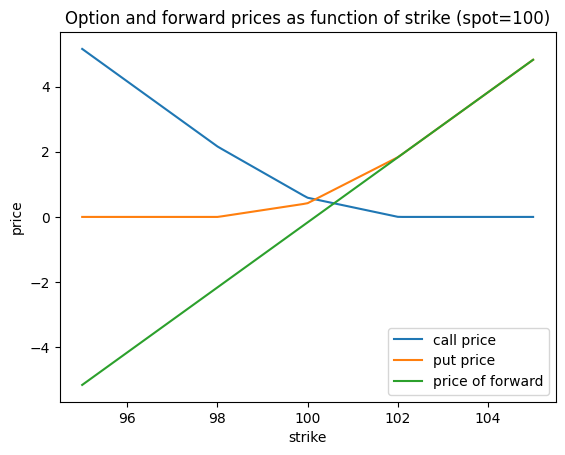

In [ ]:
min_strike, max_strike = 95, 105
num_samples = 100
step_size = (max_strike - min_strike)/num_samples

S = 100
T = 2 / 12
r = 0.01
N = 2
u = 1.01
d = 0.99

strikes = [min_strike + i*step_size for i in range(num_samples+1)]
call_prices = [BinomialTreeModel(S,K,T,r,sigma=0,N=N,option_type='call',u=u,d=d).price() for K in strikes]
put_prices = [BinomialTreeModel(S,K,T,r,sigma=0,N=N,option_type='put',u=u,d=d).price() for K in strikes]
forward_prices = [K*np.exp(-2*(0.01/12)) -100 for K in strikes]

plt.plot(strikes, call_prices, label="call price")
plt.plot(strikes, put_prices, label="put price")
plt.xlabel("strike")
plt.ylabel("price")
plt.title("Option price as function of strike (spot=100)")
plt.legend()
plt.show()

plt.cla()
plt.plot(strikes, call_prices, label="call price")
plt.plot(strikes, put_prices, label="put price")
plt.plot(strikes, forward_prices, label="price of forward")
plt.xlabel("strike")
plt.ylabel("price")
plt.title("Option and forward prices as function of strike (spot=100)")
plt.legend()
plt.show()

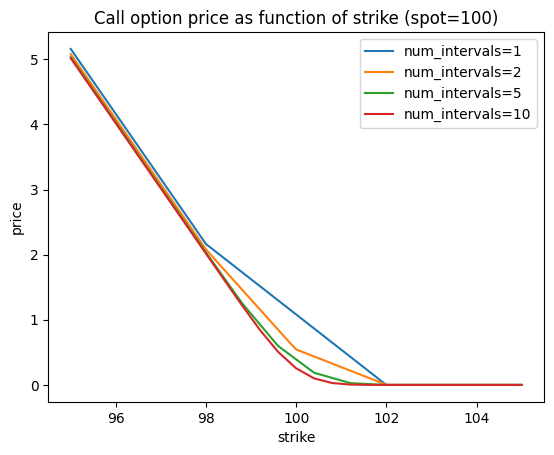

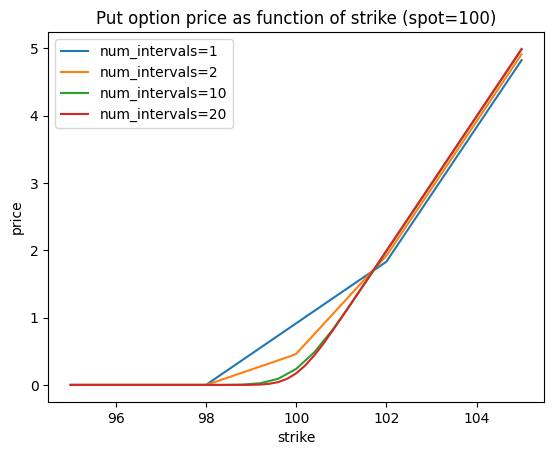

In [ ]:
min_strike, max_strike = 95, 105
num_samples = 100
step_size = (max_strike - min_strike)/num_samples

strikes = [min_strike + i*step_size for i in range(num_samples+1)]
for i in [1,2,5,10]:
    call_prices_i = [BinomialTreeModel(
            u=1+ (1.02 -1)/i,
            d=1 - (1-0.98)/i,
            S=100,
            K=K,
            T=(2/12)/i,
            N=i,
            r=0.01,
            sigma=0,
            option_type='call'

        ).price() for K in strikes]
    plt.plot(strikes, call_prices_i, label=f"num_intervals={i}")
plt.xlabel("strike")
plt.ylabel("price")
plt.title("Call option price as function of strike (spot=100)")
plt.legend()
plt.show()


plt.cla()
for i in [1,2,10,20]:
    put_prices_i = [BinomialTreeModel(
            u=1+ (1.02 -1)/i,
            d=1 - (1-0.98)/i,
            S=100,
            K=K,
            T=(2/12)/i,
            N=i,
            r=0.01,
            sigma=0,
            option_type='put'
        ).price() for K in strikes]
    plt.plot(strikes, put_prices_i, label=f"num_intervals={i}")

plt.xlabel("strike")
plt.ylabel("price")
plt.title("Put option price as function of strike (spot=100)")
plt.legend()
plt.show()



#Black-Scholes Model

### The Black-Scholes Partial Differential Equation (PDE):

The fundamental **Black-Scholes PDE** is:

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + r S \frac{\partial V}{\partial S} - rV = 0
$$

Where:

* $V(S, t)$: Price of the option at time $t$ when the stock price is $S$
* $\sigma$: Volatility of the stock
* $r$: Risk-free interest rate
* $\frac{\partial V}{\partial t}$: Change in option value with respect to time
* $\frac{\partial V}{\partial S}$, $\frac{\partial^2 V}{\partial S^2}$: First and second derivatives of option value with respect to the stock price



---

### Closed-form Solutions for European Options

Black and Scholes derived **closed-form formulas** for pricing European **call** and **put** options.

#### **Call Option Price:**

$$
C = S_0 N(d_1) - K e^{-rt} N(d_2)
$$

#### **Put Option Price:**

$$
P = K e^{-rt} N(-d_2) - S_0 N(-d_1)
$$

Where:

* $S_0$: Current stock price
* $K$: Strike price of the option
* $t$: Time to maturity (in years)
* $r$: Risk-free interest rate
* $\sigma$: Volatility of the stock
* $N(\cdot)$: Cumulative distribution function of the standard normal distribution

$$
d_1 = \frac{\ln(S_0/K) + (r + \frac{\sigma^2}{2})t}{\sigma \sqrt{t}}, \quad d_2 = d_1 - \sigma \sqrt{t}
$$


##CODE

In [ ]:

import numpy as np
from scipy.stats import norm

class BlackScholesModel:
    def __init__(self, S, K, T, r, sigma, option_type='call'):
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma
        self.option_type = option_type

    def d1(self):
        return (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma**2) * self.T) / (self.sigma * np.sqrt(self.T))

    def d2(self):
        return self.d1() - self.sigma * np.sqrt(self.T)

    def price(self):
        d1 = self.d1()
        d2 = self.d2()
        if self.option_type == 'call':
            return self.S * norm.cdf(d1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2)
        elif self.option_type == 'put':
            return self.K * np.exp(-self.r * self.T) * norm.cdf(-d2) - self.S * norm.cdf(-d1)

    def greeks(self):
        d1 = self.d1()
        d2 = self.d2()
        delta = norm.cdf(d1) if self.option_type == 'call' else norm.cdf(d1) - 1
        gamma = norm.pdf(d1) / (self.S * self.sigma * np.sqrt(self.T))
        vega = self.S * norm.pdf(d1) * np.sqrt(self.T)
        theta_call = (-self.S * norm.pdf(d1) * self.sigma / (2 * np.sqrt(self.T)) - self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(d2))
        theta_put = (-self.S * norm.pdf(d1) * self.sigma / (2 * np.sqrt(self.T)) + self.r * self.K * np.exp(-self.r * self.T) * norm.cdf(-d2))
        theta = theta_call if self.option_type == 'call' else theta_put
        rho_call = self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(d2)
        rho_put = -self.K * self.T * np.exp(-self.r * self.T) * norm.cdf(-d2)
        rho = rho_call if self.option_type == 'call' else rho_put
        return {'Delta': delta, 'Gamma': gamma, 'Vega': vega / 100, 'Theta': theta / 365, 'Rho': rho / 100}


In [ ]:
bs=BlackScholesModel(S=100, K=100, T=1, r=0.05, sigma=0.2, option_type='call')
print(bs.price())
print(bs.greeks())

10.450583572185565
{'Delta': np.float64(0.6368306511756191), 'Gamma': np.float64(0.018762017345846895), 'Vega': np.float64(0.3752403469169379), 'Theta': np.float64(-0.01757267820941972), 'Rho': np.float64(0.5323248154537634)}


In [ ]:
def implied_volatility_from_uptick(up_tick, time_interval):
    return np.log(up_tick)/np.sqrt(time_interval)
volatility=implied_volatility_from_uptick(up_tick=1.01, time_interval=1/12)
print(volatility)



0.03446895717961462


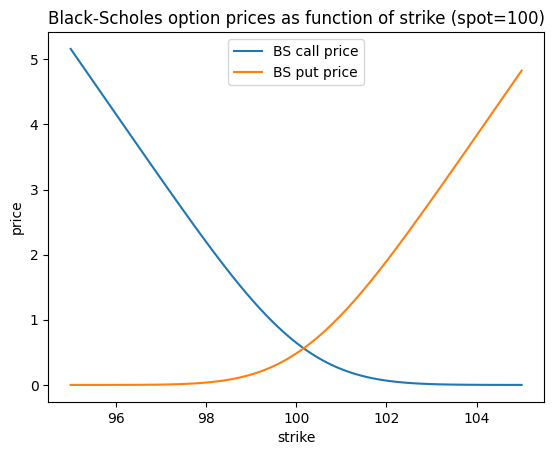

In [ ]:
min_strike, max_strike = 95, 105
num_samples = 100
step_size = (max_strike - min_strike)/num_samples

def implied_volatility_from_uptick(up_tick, time_interval):
    return np.log(up_tick)/np.sqrt(time_interval)

strikes = [min_strike + i*step_size for i in range(num_samples+1)]
bsm_call_prices = []
bsm_put_prices = []

S=100,
volatility=round(implied_volatility_from_uptick(up_tick=1.01, time_interval=1/12),4)
r=0.01
T=2

for K in strikes:
    bsm_call = BlackScholesModel(S=100, K=K, T=2/12, r=0.01, sigma=volatility, option_type='call').price()
    bsm_put = BlackScholesModel(S=100, K=K, T=2/12, r=0.01, sigma=volatility, option_type='put').price()

    price_of_forward = K*np.exp(-2*(0.01/12)) -100

    bsm_call_prices.append(bsm_call)
    bsm_put_prices.append(bsm_put)

plt.plot(strikes, bsm_call_prices, label="BS call price")
plt.plot(strikes, bsm_put_prices, label="BS put price")
plt.xlabel("strike")
plt.ylabel("price")
plt.title("Black-Scholes option prices as function of strike (spot=100)")
plt.legend()
plt.show()

#Convergence Of Binomial Model into Black-Scholes Model As N (number of steps) Increases

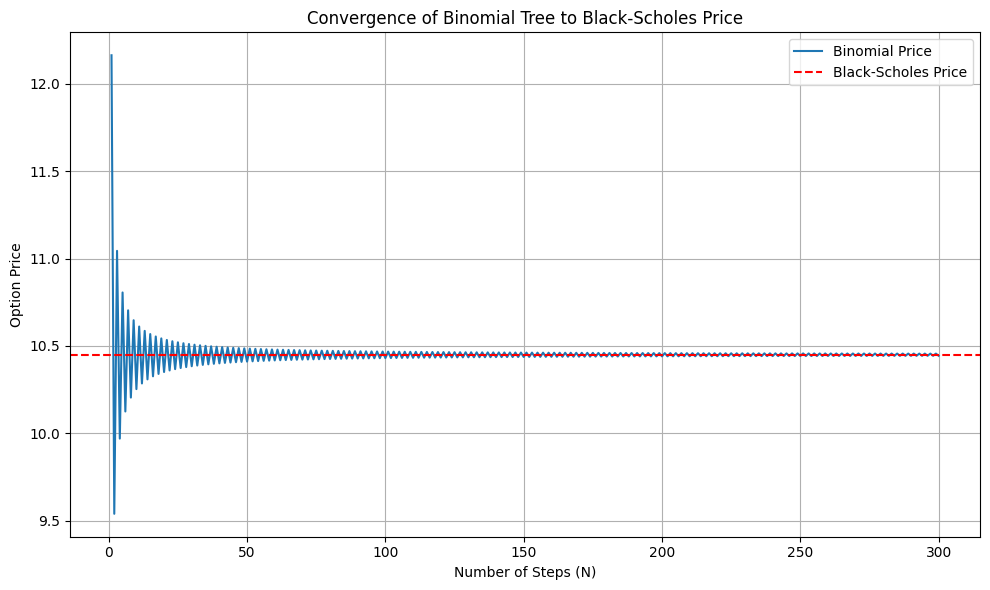

In [ ]:
import matplotlib.pyplot as plt

S, K, T, r, sigma = 100, 100, 1, 0.05, 0.2
bs_price = BlackScholesModel(S, K, T, r, sigma, 'call').price()

steps = np.arange(1, 301)
binomial_prices = [BinomialTreeModel(S, K, T, r, sigma, N=n, option_type='call').price() for n in steps]

plt.figure(figsize=(10, 6))
plt.plot(steps, binomial_prices, label='Binomial Price')
plt.axhline(bs_price, color='red', linestyle='--', label='Black-Scholes Price')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.title('Convergence of Binomial Tree to Black-Scholes Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Sensitivity Analysis

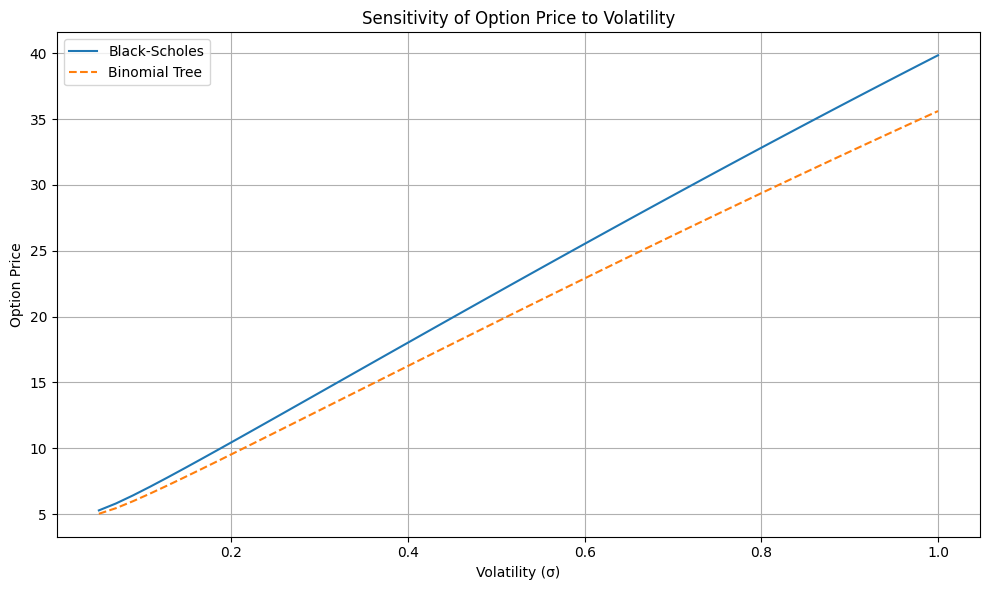

In [ ]:
vols = np.linspace(0.05, 1.0, 50)
bs_prices = [BlackScholesModel(S, K, T, r, v,'call').price() for v in vols]
bt_prices = [BinomialTreeModel(S, K, T, r, v, N=2, option_type='call').price() for v in vols]

plt.figure(figsize=(10, 6))
plt.plot(vols, bs_prices, label='Black-Scholes')
plt.plot(vols, bt_prices, linestyle='--', label='Binomial Tree')
plt.xlabel('Volatility (σ)')
plt.ylabel('Option Price')
plt.title('Sensitivity of Option Price to Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


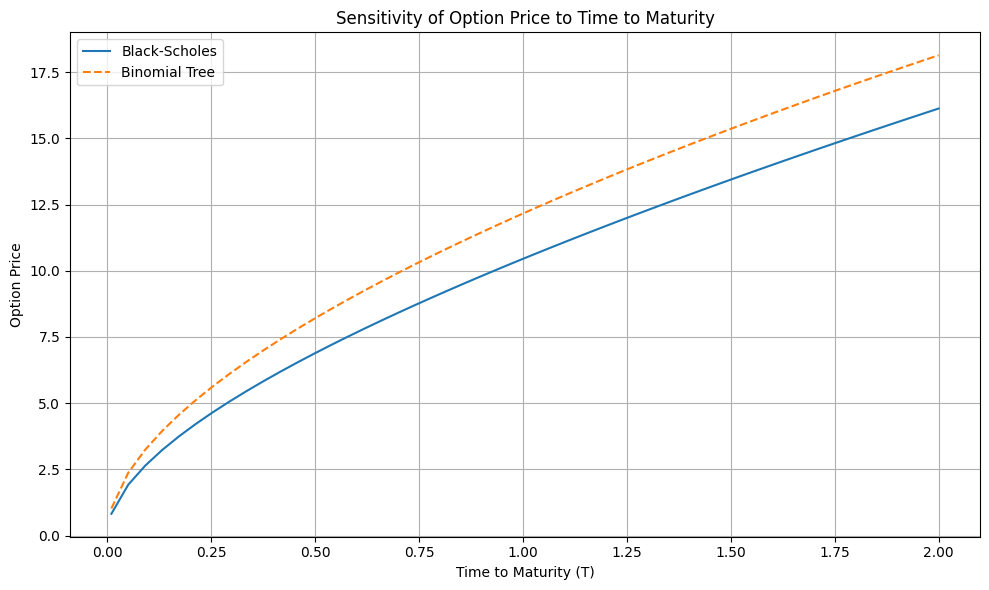

In [ ]:
Ts = np.linspace(0.01, 2, 50)
bs_prices = [BlackScholesModel(S, K, t, r, sigma, 'call').price() for t in Ts]
bt_prices = [BinomialTreeModel(S, K, t, r, sigma, N=1, option_type='call').price() for t in Ts]

plt.figure(figsize=(10, 6))
plt.plot(Ts, bs_prices, label='Black-Scholes')
plt.plot(Ts, bt_prices, linestyle='--', label='Binomial Tree')
plt.xlabel('Time to Maturity (T)')
plt.ylabel('Option Price')
plt.title('Sensitivity of Option Price to Time to Maturity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


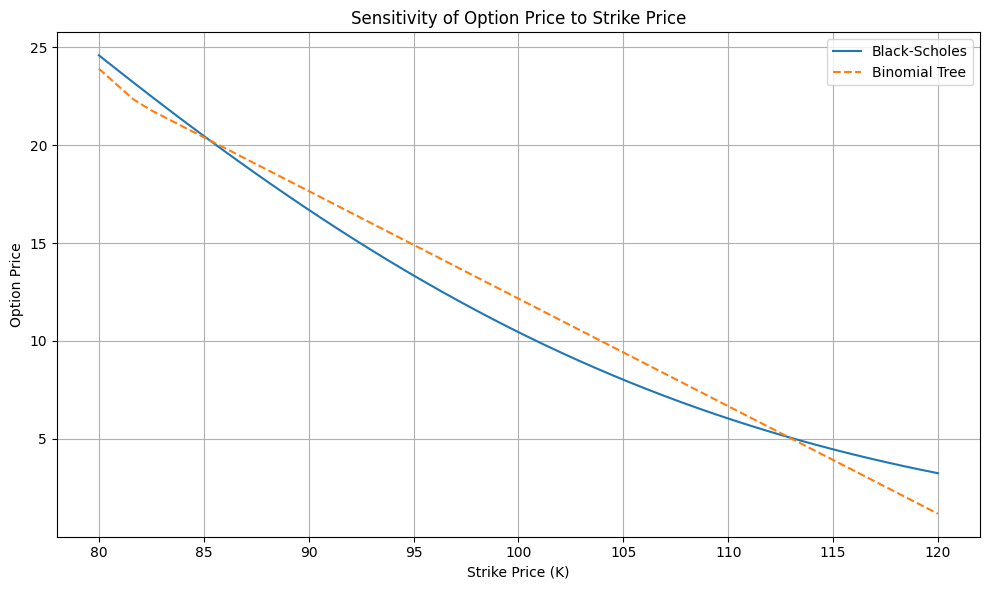

In [ ]:
Ks = np.linspace(80, 120, 50)
bs_prices = [BlackScholesModel(S, k, T, r, sigma, 'call').price() for k in Ks]
bt_prices = [BinomialTreeModel(S, k, T, r, sigma, N=1, option_type='call').price() for k in Ks]

plt.figure(figsize=(10, 6))
plt.plot(Ks, bs_prices, label='Black-Scholes')
plt.plot(Ks, bt_prices, linestyle='--', label='Binomial Tree')
plt.xlabel('Strike Price (K)')
plt.ylabel('Option Price')
plt.title('Sensitivity of Option Price to Strike Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


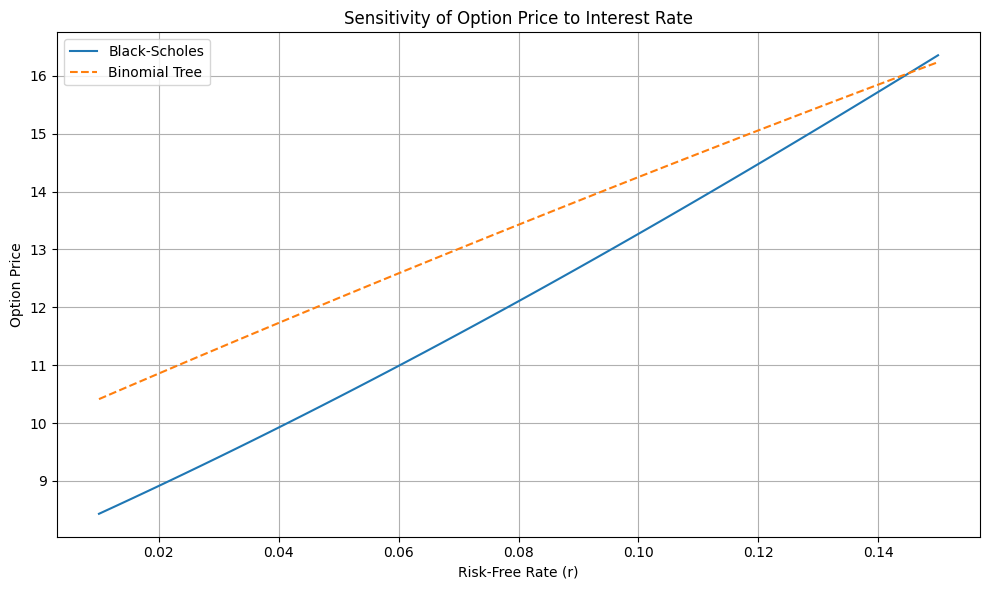

In [ ]:
rs = np.linspace(0.01, 0.15, 50)
bs_prices = [BlackScholesModel(S, K, T, r_, sigma, 'call').price() for r_ in rs]
bt_prices = [BinomialTreeModel(S, K, T, r_, sigma, N=1, option_type='call').price() for r_ in rs]

plt.figure(figsize=(10, 6))
plt.plot(rs, bs_prices, label='Black-Scholes')
plt.plot(rs, bt_prices, linestyle='--', label='Binomial Tree')
plt.xlabel('Risk-Free Rate (r)')
plt.ylabel('Option Price')
plt.title('Sensitivity of Option Price to Interest Rate')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Model's Prediction Vs Market Prices


In [ ]:

# Function to compare the option prices predicted by BSM and real option price, we have take average volitality of past 30 days.....

def analyze_option(ticker_str, expiry_date, option_type='call', hist_vol_days=30):
    import yfinance as yf
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.stats import norm


    ticker = yf.Ticker(ticker_str)
    expirations = ticker.options
    if expiry_date not in expirations:
        raise ValueError(f"Expiry date {expiry_date} not available. Try one of: {expirations}")

    opt_chain = ticker.option_chain(expiry_date)
    options = opt_chain.calls if option_type == 'call' else opt_chain.puts


    hist_data = ticker.history(period=f'{hist_vol_days + 1}d')
    S = hist_data['Close'].iloc[-1]
    T = (pd.to_datetime(expiry_date) - pd.Timestamp.today()).days / 365
    r = 0.05  # Constant risk-free rate

    # Calculate historical volatility (annualized)
    log_returns = np.log(hist_data['Close'] / hist_data['Close'].shift(1)).dropna()
    hist_vol = np.std(log_returns) * np.sqrt(252)

    # Filter near-the-money options
    sample = options[options['strike'].between(S * 0.95, S * 1.05)].copy()

    # Compute model prices using historical volatility
    sample['model_price'] = sample.apply(
        lambda row: round(BlackScholesModel(S, row['strike'], T, r, hist_vol, option_type).price(), 4),
        axis=1
    )
    sample['abs_error'] = abs(sample['model_price'] - sample['lastPrice'])


    plt.figure(figsize=(10, 6))
    plt.plot(sample['strike'], sample['lastPrice'], label='Market Price', marker='o')
    plt.plot(sample['strike'], sample['model_price'], label='Model Price (Hist. Vol)', marker='x')
    plt.xlabel('Strike Price')
    plt.ylabel('Option Price')
    plt.title(f'{option_type.capitalize()} Options for {ticker_str} (Exp: {expiry_date})\n'
              f'Hist Volatility: {hist_vol:.2%}, Spot: {S:.2f}')
    plt.legend()
    plt.grid(True)
    plt.show()

    return sample[['strike', 'lastPrice', 'model_price', 'abs_error']]





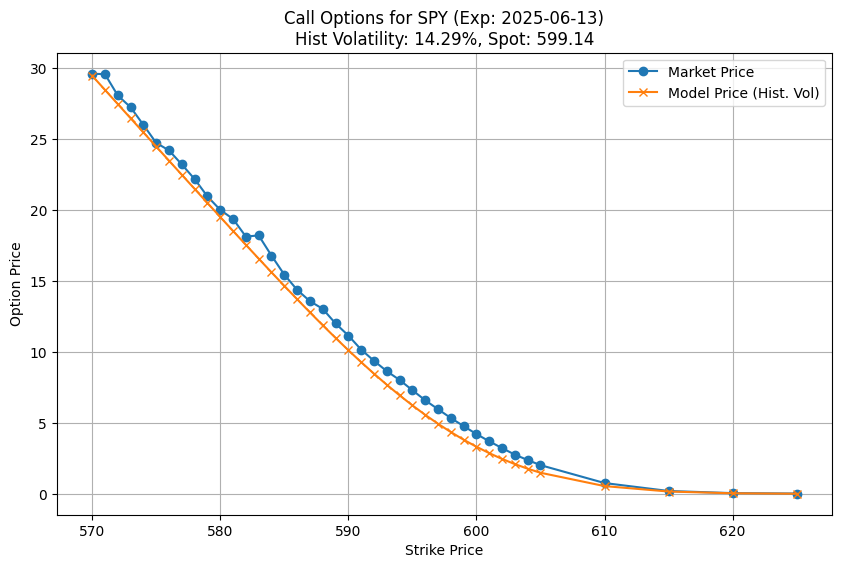

     strike  lastPrice  model_price  abs_error
61    570.0      29.59      29.4531     0.1369
62    571.0      29.56      28.4541     1.1059
63    572.0      28.06      27.4554     0.6046
64    573.0      27.23      26.4570     0.7730
65    574.0      25.99      25.4591     0.5309
66    575.0      24.72      24.4620     0.2580
67    576.0      24.19      23.4658     0.7242
68    577.0      23.20      22.4710     0.7290
69    578.0      22.17      21.4779     0.6921
70    579.0      20.95      20.4873     0.4627
71    580.0      20.00      19.4999     0.5001
72    581.0      19.36      18.5165     0.8435
73    582.0      18.12      17.5384     0.5816
74    583.0      18.20      16.5669     1.6331
75    584.0      16.78      15.6036     1.1764
76    585.0      15.44      14.6504     0.7896
77    586.0      14.37      13.7093     0.6607
78    587.0      13.57      12.7828     0.7872
79    588.0      13.03      11.8734     1.1566
80    589.0      12.00      10.9838     1.0162
81    590.0  

In [ ]:
print(analyze_option("SPY", "2025-06-13", "call"))

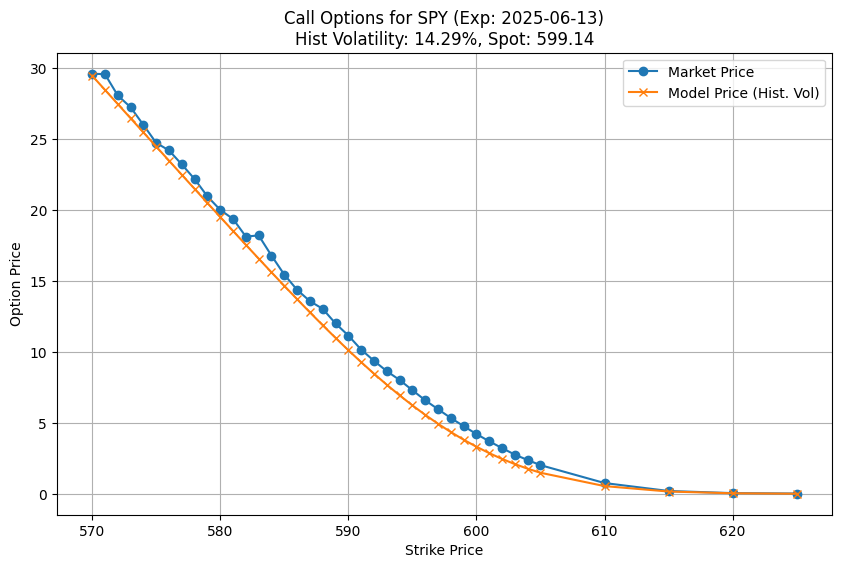

     strike  lastPrice  model_price  abs_error
61    570.0      29.59      29.4531     0.1369
62    571.0      29.56      28.4541     1.1059
63    572.0      28.06      27.4554     0.6046
64    573.0      27.23      26.4570     0.7730
65    574.0      25.99      25.4591     0.5309
66    575.0      24.72      24.4620     0.2580
67    576.0      24.19      23.4658     0.7242
68    577.0      23.20      22.4710     0.7290
69    578.0      22.17      21.4779     0.6921
70    579.0      20.95      20.4873     0.4627
71    580.0      20.00      19.4999     0.5001
72    581.0      19.36      18.5165     0.8435
73    582.0      18.12      17.5384     0.5816
74    583.0      18.20      16.5669     1.6331
75    584.0      16.78      15.6036     1.1764
76    585.0      15.44      14.6504     0.7896
77    586.0      14.37      13.7093     0.6607
78    587.0      13.57      12.7828     0.7872
79    588.0      13.03      11.8734     1.1566
80    589.0      12.00      10.9838     1.0162
81    590.0  

In [ ]:
print(analyze_option("SPY", "2025-06-13", "call"))

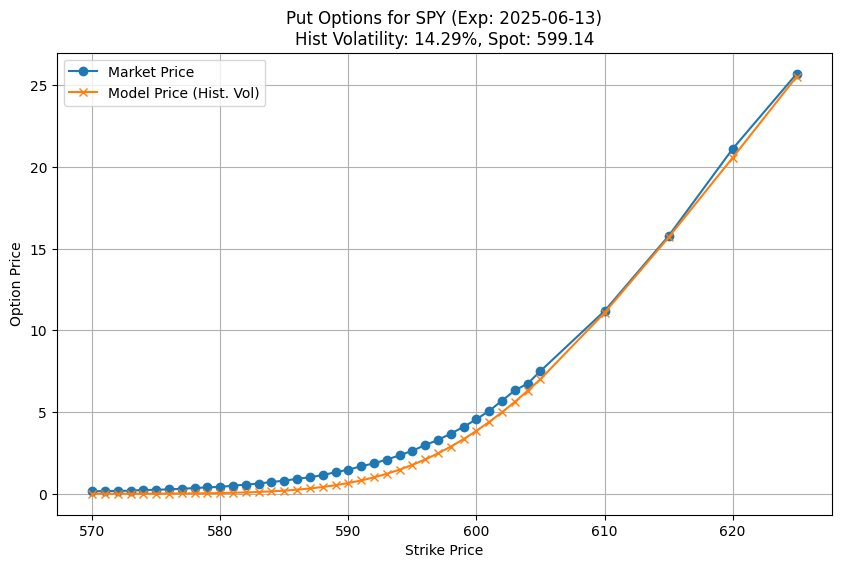

     strike  lastPrice  model_price  abs_error
71    570.0       0.14       0.0008     0.1392
72    571.0       0.17       0.0013     0.1687
73    572.0       0.17       0.0020     0.1680
74    573.0       0.19       0.0031     0.1869
75    574.0       0.23       0.0047     0.2253
76    575.0       0.24       0.0070     0.2330
77    576.0       0.27       0.0103     0.2597
78    577.0       0.30       0.0149     0.2851
79    578.0       0.35       0.0213     0.3287
80    579.0       0.39       0.0301     0.3599
81    580.0       0.42       0.0421     0.3779
82    581.0       0.49       0.0583     0.4317
83    582.0       0.56       0.0796     0.4804
84    583.0       0.62       0.1076     0.5124
85    584.0       0.72       0.1437     0.5763
86    585.0       0.80       0.1899     0.6101
87    586.0       0.91       0.2483     0.6617
88    587.0       1.01       0.3212     0.6888
89    588.0       1.14       0.4112     0.7288
90    589.0       1.32       0.5212     0.7988
91    590.0  

In [ ]:
print(analyze_option("SPY", "2025-06-13", "put"))

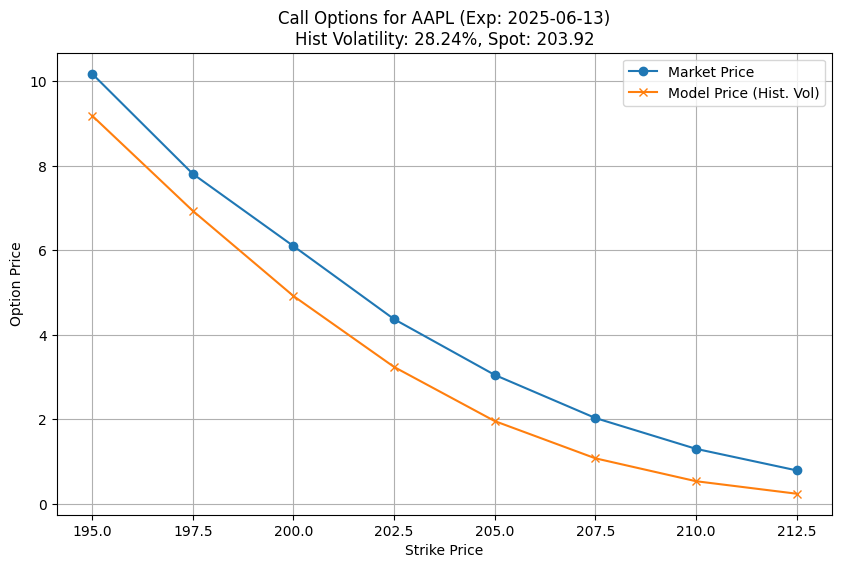

    strike  lastPrice  model_price  abs_error
20   195.0      10.18       9.1874     0.9926
21   197.5       7.81       6.9346     0.8754
22   200.0       6.10       4.9187     1.1813
23   202.5       4.37       3.2386     1.1314
24   205.0       3.05       1.9574     1.0926
25   207.5       2.03       1.0759     0.9541
26   210.0       1.30       0.5339     0.7661
27   212.5       0.79       0.2379     0.5521


In [ ]:
print(analyze_option("AAPL", "2025-06-13", "call"))

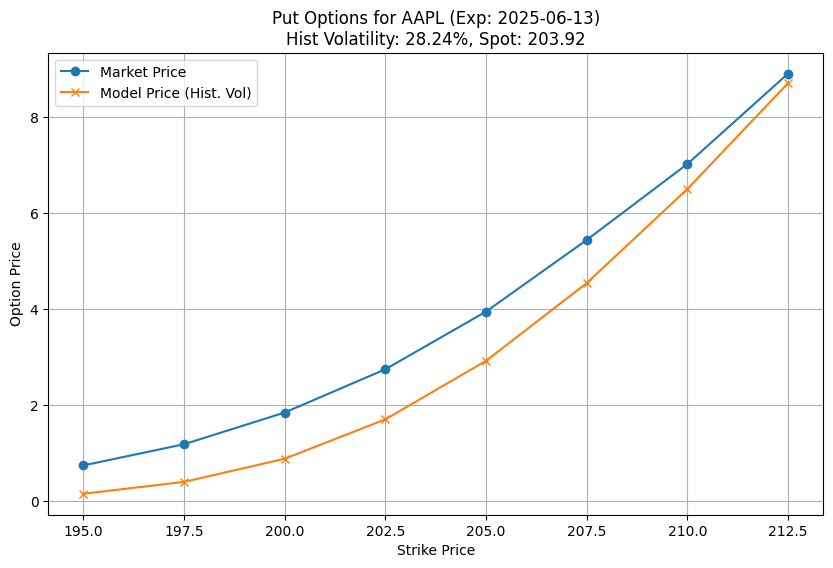

    strike  lastPrice  model_price  abs_error
21   195.0       0.75       0.1606     0.5894
22   197.5       1.19       0.4064     0.7836
23   200.0       1.85       0.8891     0.9609
24   202.5       2.75       1.7077     1.0423
25   205.0       3.95       2.9251     1.0249
26   207.5       5.44       4.5422     0.8978
27   210.0       7.02       6.4988     0.5212
28   212.5       8.90       8.7015     0.1985


In [ ]:
print(analyze_option("AAPL", "2025-06-13", "put"))

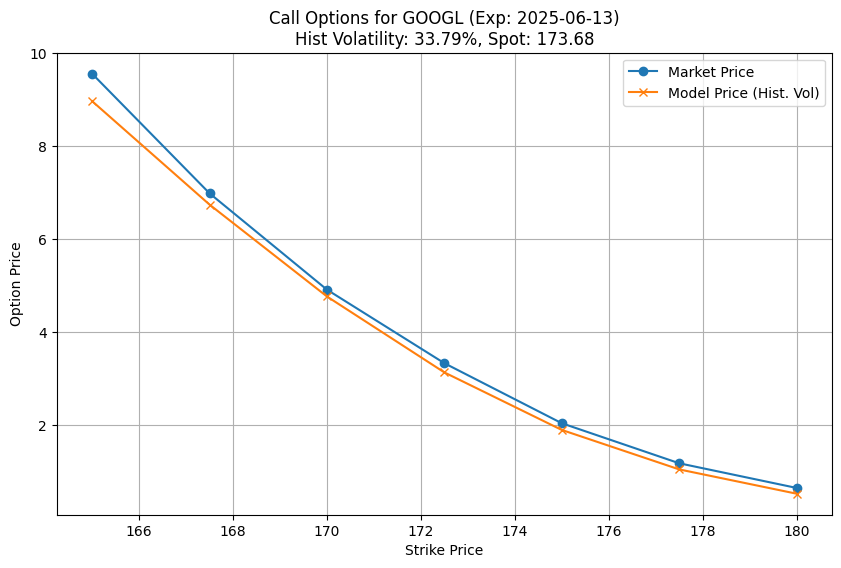

    strike  lastPrice  model_price  abs_error
22   165.0       9.55       8.9604     0.5896
23   167.5       6.98       6.7375     0.2425
24   170.0       4.91       4.7638     0.1462
25   172.5       3.33       3.1321     0.1979
26   175.0       2.04       1.8960     0.1440
27   177.5       1.18       1.0482     0.1318
28   180.0       0.65       0.5261     0.1239


In [ ]:
print(analyze_option("GOOGL", "2025-06-13", "call"))

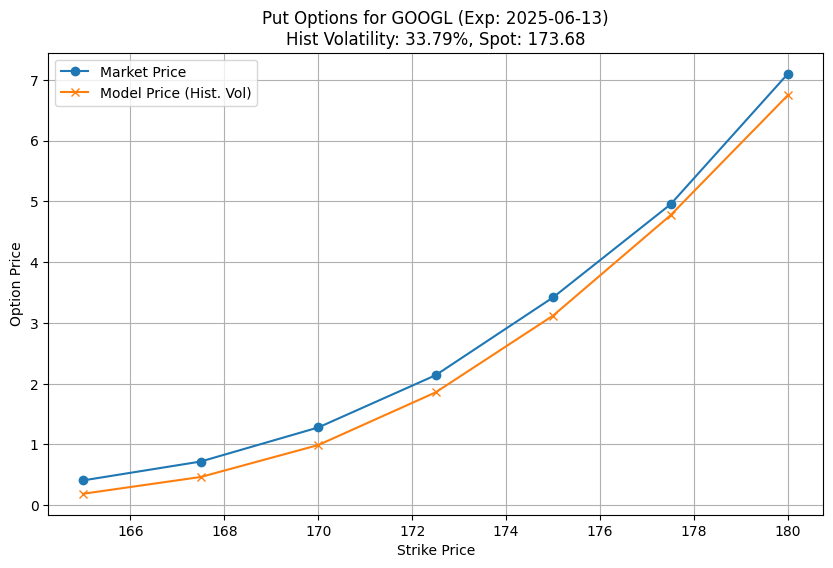

    strike  lastPrice  model_price  abs_error
23   165.0       0.41       0.1901     0.2199
24   167.5       0.72       0.4657     0.2543
25   170.0       1.28       0.9907     0.2893
26   172.5       2.14       1.8576     0.2824
27   175.0       3.42       3.1201     0.2999
28   177.5       4.95       4.7710     0.1790
29   180.0       7.10       6.7475     0.3525


In [ ]:
print(analyze_option("GOOGL", "2025-06-13", "put"))